# MMC - Laboratorium 6 - Bartosz Sosik (310287)

## Zadanie 1 i 2

### Wstęp
Model Isinga to siatkowy układ oddziałujących wzajemnie cząstek-spinów.
- Zespół mikrokanoniczny - opisuje izolowane od otoczenia układy zamknięte, w których liczba cząsteczek $N$, objętość $V$ oraz energia $E$ są stałe. Symulacja w tym zespole polega na wprowadzeniu do układu dodatkowego stopnia swobody zwanego "duszkiem", który porusza się po układzie i może wymieniać energię z obecnymi w nim cząsteczkami. 
- Zespół kanoniczny -  przyjmuje się, że spin jest odwracany z pewnym prawdopodobieństwem zależnym od temperatury.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

/home/bsosik/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/bsosik/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# Otwarcie plików dla modelu mikrokanonicznego

mikro_l10 = pd.read_csv('mikro_l10.csv')
mikro_l20 = pd.read_csv("mikro_l20.csv")
mikro_l40 = pd.read_csv("mikro_l40.csv")

mikro_l10.head()

,E,L,srednia_e_ukladu,srednia_magnetyzacja,srednia_e_duszka,temperatura
0,-184,10,-184.280,0.95714,0.280,1.46686
1,-176,10,-176.496,0.93072,0.496,1.81458
2,-168,10,-168.732,0.89648,0.732,2.14325
3,-160,10,-160.788,0.86288,0.788,2.21684
4,-152,10,-152.864,0.82270,0.864,2.31476


In [3]:
# Otwarcie plików dla modelu kanonicznego

kanon_l10 = pd.read_csv('kanon_l10.csv')
kanon_l20 = pd.read_csv("kanon_l20.csv")
kanon_l40 = pd.read_csv("kanon_l40.csv")

kanon_l10.head()

,temperatura,L,srednia_e_ukladu,srednia_magnetyzacja
0,1.00,10,-199.720,0.99928
1,1.02,10,-199.680,0.99918
2,1.04,10,-199.564,0.99886
3,1.06,10,-199.496,0.99868
4,1.08,10,-199.432,0.99848


In [10]:
def plot_results(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Wykres średniej magnetyzacji od temperatury
    ax1.plot(df['temperatura'], df["srednia_magnetyzacja"])
    ax1.set_title('Zależność średniej magnetyzacji od temperatury')
    ax1.set_xlabel('Temperatura')
    ax1.set_ylabel('Średnia magnetyzacja')

    # Wykres średniej energii układu od temperatury
    ax2.plot(df["temperatura"], df["srednia_e_ukladu"], 'r')
    ax2.set_title('Zależność średniej energii układu od temperatury')
    ax2.set_xlabel('Temperatura')
    ax2.set_ylabel('srednia energia układu')

    plt.tight_layout()

In [15]:
def plot_compare(df_mikro, df_kanon):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Wykres średniej magnetyzacji od temperatury
    ax1.plot(df_mikro['temperatura'], df_mikro["srednia_magnetyzacja"], label="Mikrokanoniczny")
    ax1.plot(df_kanon['temperatura'], df_kanon["srednia_magnetyzacja"], label="Kanoniczny")
    ax1.set_title('Zależność średniej magnetyzacji od temperatury')
    ax1.set_xlabel('Temperatura')
    ax1.set_ylabel('Średnia magnetyzacja')
    ax1.legend()

    # Wykres średniej energii układu od temperatury
    ax2.plot(df_mikro["temperatura"], df_mikro["srednia_e_ukladu"], label="Mikrokanoniczny")
    ax2.plot(df_kanon["temperatura"], df_kanon["srednia_e_ukladu"], label="Kanoniczny")
    ax2.set_title('Zależność średniej energii układu od temperatury')
    ax2.set_xlabel('Temperatura')
    ax2.set_ylabel('Średnia energia układu')
    ax2.legend()

    plt.tight_layout()
    plt.legend(loc='best')

## Zespół mikrokanoniczny
Przeprowadzono eksperymenty dla trzech wielkości siatki (10, 20, 40) oraz zadanych wartości energii. Wyniki zaprezentowane zostały na poniższych wykresach.

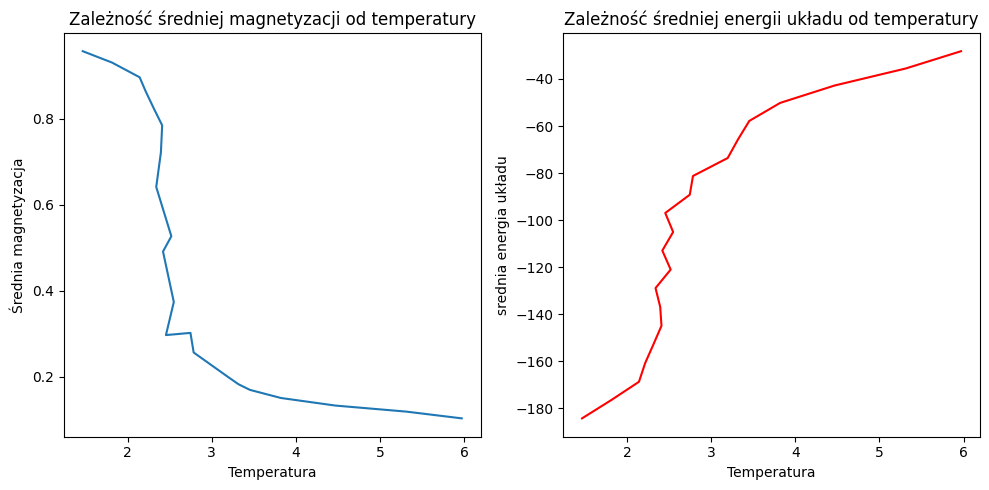

In [6]:
plot_results(mikro_l10)

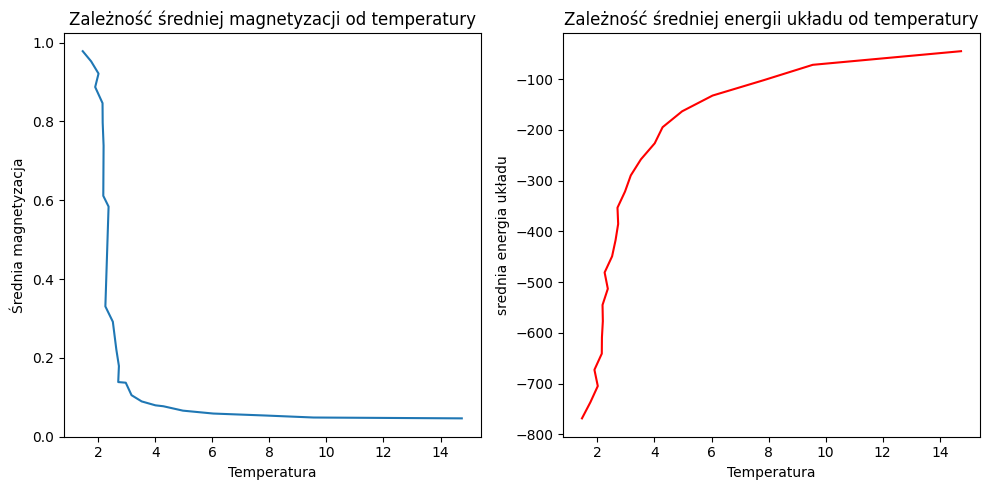

In [24]:
plot_results(mikro_l20)

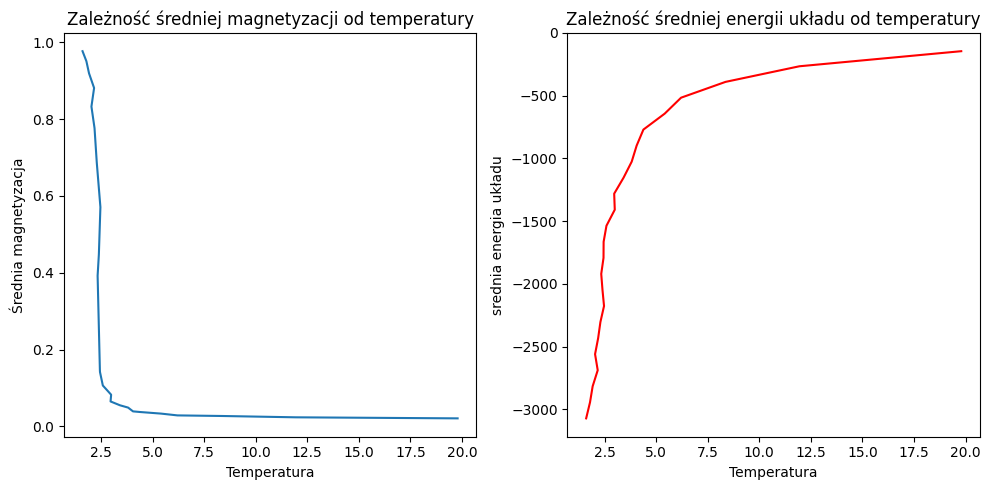

In [25]:
plot_results(mikro_l40)

Przy temperaturze około 2.5 stopnia nastepuje nagły spadek średniej magnetyzacji oraz wzrost średniej energii układu - ma miejsce przejście fazowe.

## Model kanoniczny

Należało zmodyfikować podany kod w C++ w celu umożliwienia symulacji w zespole kanonicznym. W układzie kanonicznym zadawana jest temperatura, nie energia przekazywana układowi. Z tego powodu dodano "dodatkowy" konstruktor, który jako drugi argument przyjmuje liczbę typu float - temperaturę. Następnie zmodyfikowano funckję "sprobuj\_odwrocic\_spin\_losowego\_atomu(). Jeśli $\Delta E < 0$ to akceptujemy nowy stan. W przeciwnym wypadku, spin jest odwracany z pewnym prawdopodobieństwem zależnym od temperatury. Prawdopodobieństwo przejścia: $w=e^{-\Delta E/k_BT}$. Generujemy liczbę pseudolosową z rozkładu równomiernego na przedziale $(0,1)$. Jeśli $r<=w$ to nowy stan akceptujemy. \
Zadawana była temperatura o podobnych zakresach osiąganych w przypadku modelu mikrokanonicznego. Przy przejściu fazowym natomiast, była ona gęściej próbkowana. Wyniki zaprezentowane zostały poniżej:

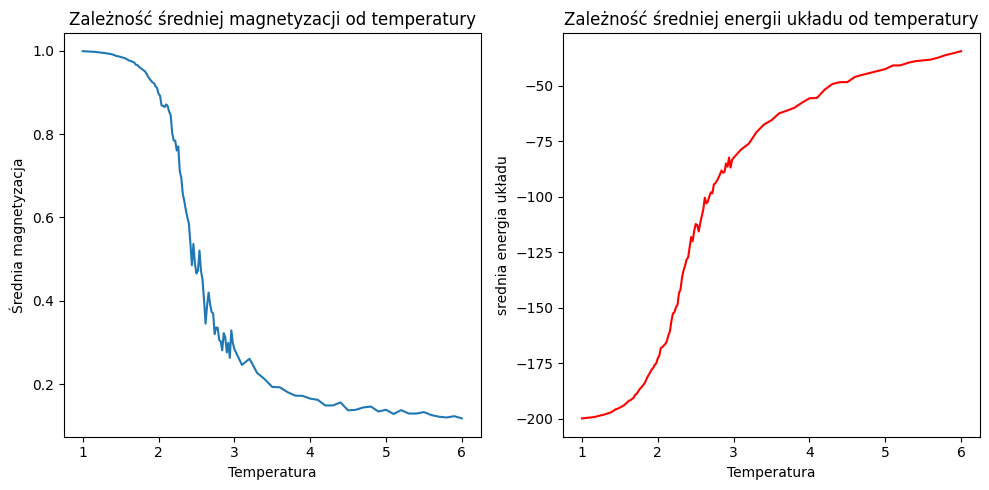

In [26]:
plot_results(kanon_l10)

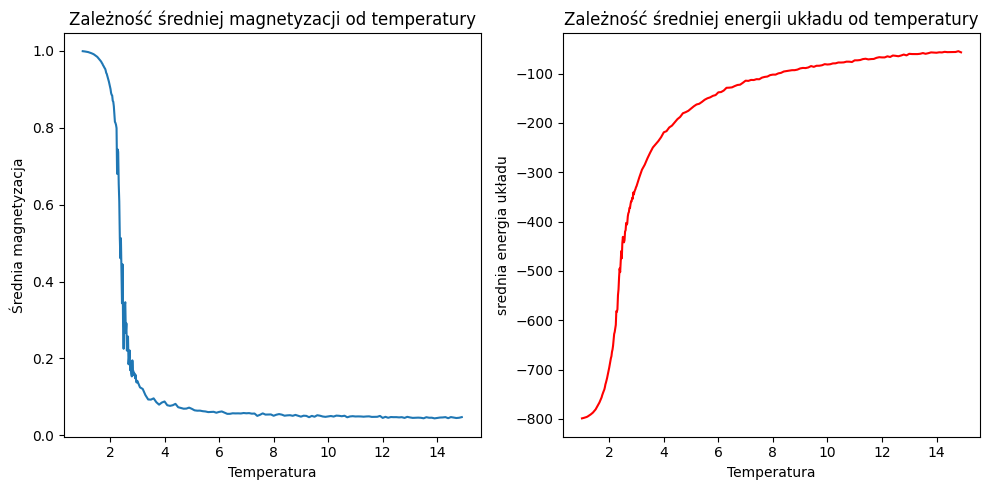

In [27]:
plot_results(kanon_l20)

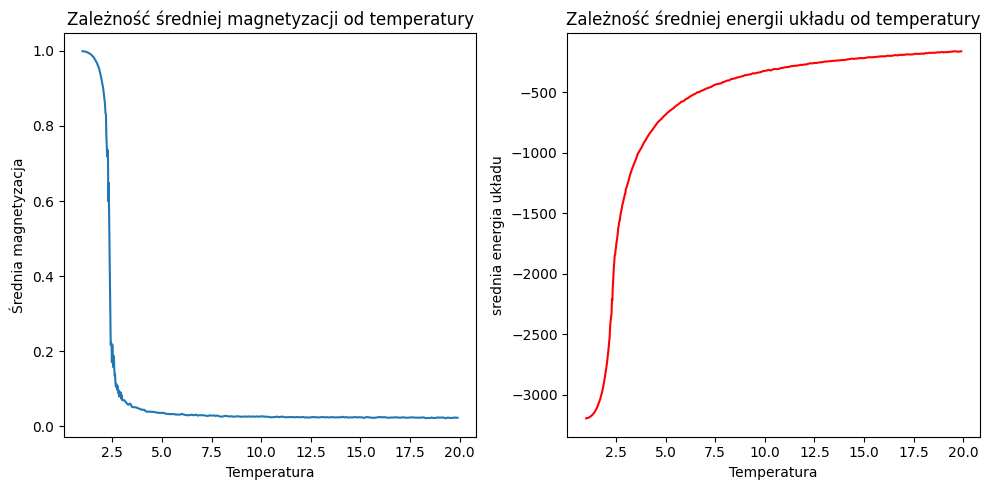

In [28]:
plot_results(kanon_l40)

Symulacja w układzie kanonicznym dała bardzo podobne rezultaty do układu mikrokanonicznego. Różnica wynika tutaj głównie z okresu próbkowania co sprawia, że wykresy (poza przejściem fazowym) sa bardziej gładkie. Rezultaty na końcu symulacji: \
Dla L=10:
| Wielkość | Model mikrokanoniczny | Model kanoniczny |
|:---------|:-------:|---------:|
|  Średnia magnetyzacja  |  0.10346   |  0.11756   |
|  Temperatura   |  5.97   |  6.0  |
|  Średnia energia układu  |  -28.192  |  -34.432   |

Dla L=20:
| Wielkość | Model mikrokanoniczny | Model kanoniczny |
|:---------|:-------:|---------:|
|  Średnia magnetyzacja  |  0.04631   |  0.047495   |
|  Temperatura   |  14.7457   |  14.9  |
|  Średnia energia układu  |  -44.836  |  -56.744   |

Dla L=40:
| Wielkość | Model mikrokanoniczny | Model kanoniczny |
|:---------|:-------:|---------:|
|  Średnia magnetyzacja  |  0.0207925   |  0.0223012   |
|  Temperatura   |  19.7927   |  19.9  |
|  Średnia energia układu  |  -145.86  |  -160.596   |

Można zauważyć, że rezultaty są bardzo podobne. W szczególności osiągane na końcach wartości średniej magnetyzacji są do siebie bardzo zbliżone. Pomiędzy średnimi energiami układu wystepują pewne różnice, jednak wynika to głownie z większego rozstrzału tych wartości. Należy także pamiętać, że dla układu mikrokanonicznego zadajemy energię, a dla kanonicznego temperaturę. Ciężko było tak ustalić temperaturę, by ze zmiennym krokiem w trakcie przejścia fazowego, doszła do identycznej wartości co w modelu mikrokanonicznym. 

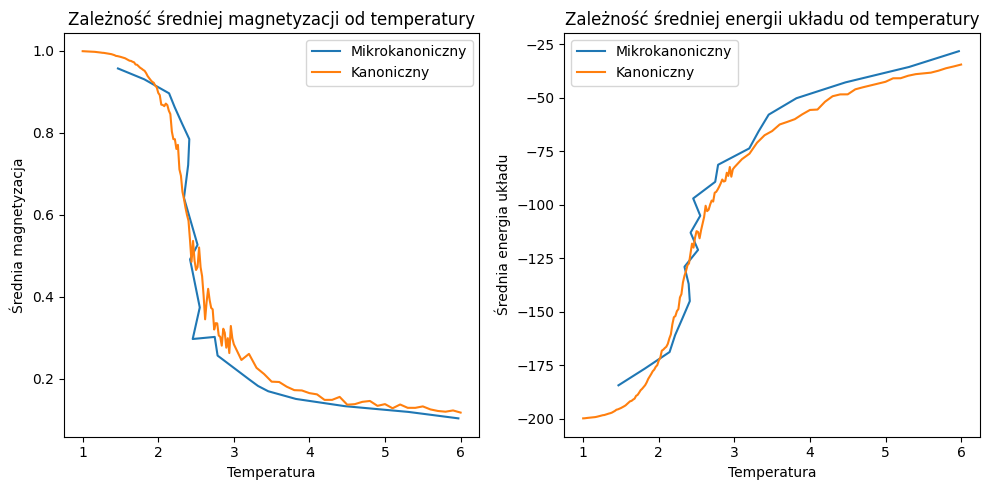

In [16]:
plot_compare(mikro_l10, kanon_l10)

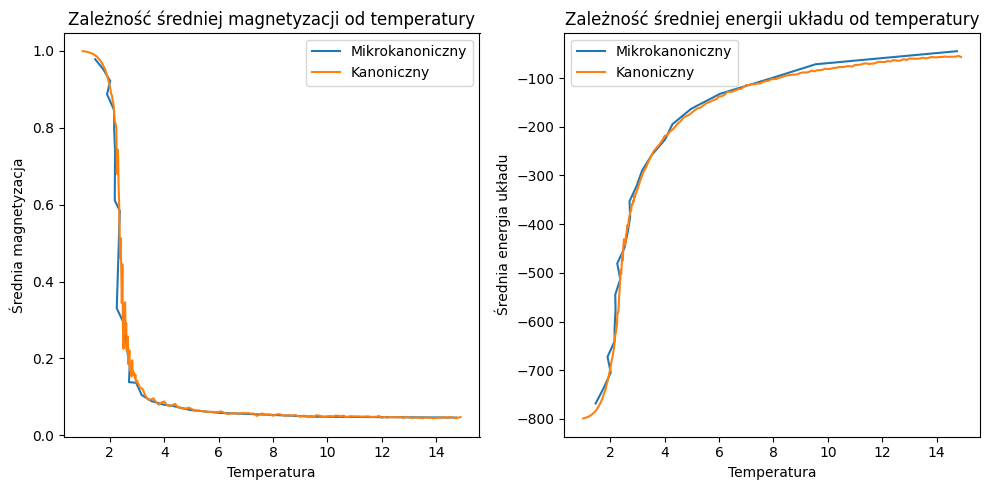

In [17]:
plot_compare(mikro_l20, kanon_l20)

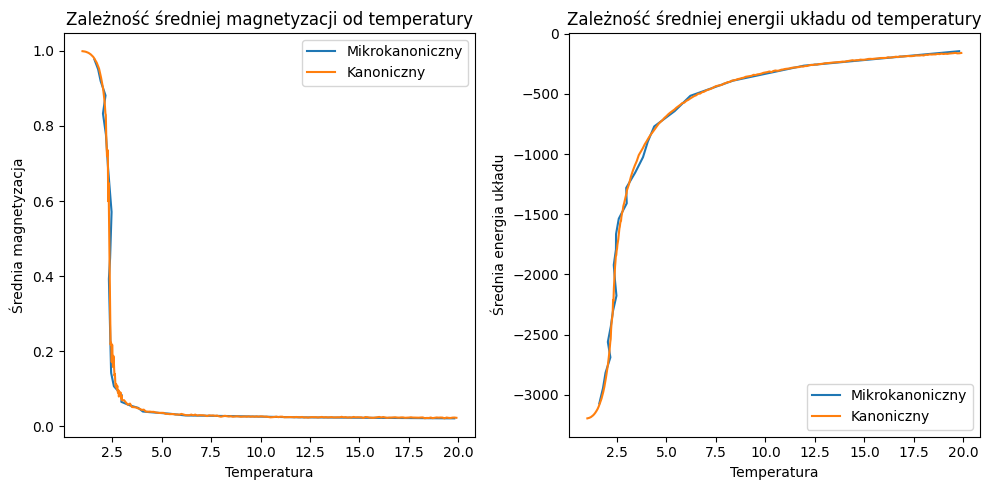

In [18]:
plot_compare(mikro_l40, kanon_l40)